In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-clustering/sample_submission.csv
/kaggle/input/digit-clustering/data.csv


# > **Import Data**

In [2]:
df = pd.read_csv('/kaggle/input/digit-clustering/data.csv')

# > **Explore Dataset**

In [3]:
df.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
IDs = df['ID']
df = df.drop('ID', axis = 1)

In [5]:
df.shape

(999, 784)

In [6]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# > **Reducing Data**

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA to your data (X)
pca = PCA().fit(df)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 95% variance
ncomponents = np.where(cumulative_variance > 0.95)[0][0] + 1

print('Number of components for 95% variance: ', ncomponents)

Number of components for 95% variance:  132


In [8]:
pca = PCA(n_components=ncomponents)
reduced_data = pca.fit_transform(df)

# > **Building Model**

In [9]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
clusters = hcluster.fit_predict(reduced_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# > **Result**

In [10]:
clusters

array([5, 0, 9, 2, 0, 0, 4, 1, 1, 1, 7, 8, 9, 1, 1, 9, 3, 0, 8, 1, 7, 6,
       3, 0, 3, 1, 6, 8, 4, 4, 7, 2, 2, 4, 4, 9, 4, 9, 9, 2, 4, 9, 2, 3,
       3, 6, 1, 4, 8, 2, 4, 1, 9, 2, 0, 3, 3, 1, 8, 9, 4, 5, 5, 0, 6, 1,
       2, 1, 9, 6, 1, 4, 3, 3, 6, 2, 4, 9, 2, 9, 5, 2, 7, 4, 3, 4, 8, 1,
       4, 2, 1, 6, 4, 6, 3, 8, 9, 3, 0, 1, 2, 3, 8, 4, 7, 7, 5, 1, 0, 6,
       0, 0, 1, 2, 0, 2, 8, 5, 9, 1, 2, 8, 2, 6, 5, 1, 8, 6, 1, 0, 2, 4,
       4, 6, 5, 5, 4, 1, 4, 1, 9, 0, 1, 2, 5, 2, 0, 5, 2, 0, 1, 5, 9, 0,
       5, 1, 8, 0, 4, 3, 6, 4, 5, 2, 6, 4, 4, 1, 2, 3, 5, 4, 5, 4, 5, 4,
       1, 7, 1, 1, 8, 1, 5, 3, 8, 5, 7, 2, 0, 3, 5, 4, 4, 0, 6, 0, 0, 4,
       1, 3, 0, 6, 6, 0, 0, 2, 4, 3, 8, 9, 4, 4, 1, 4, 7, 2, 6, 6, 5, 4,
       7, 9, 4, 4, 9, 1, 4, 6, 1, 3, 1, 3, 1, 3, 1, 3, 3, 4, 2, 3, 3, 3,
       8, 1, 5, 7, 4, 3, 0, 5, 2, 6, 3, 1, 4, 5, 9, 9, 2, 4, 0, 3, 4, 3,
       0, 1, 6, 0, 7, 2, 6, 3, 0, 0, 4, 3, 0, 2, 3, 6, 4, 5, 6, 4, 1, 0,
       0, 3, 0, 6, 5, 7, 0, 4, 3, 9, 4, 1, 3, 2, 4,

# > **Plotting**

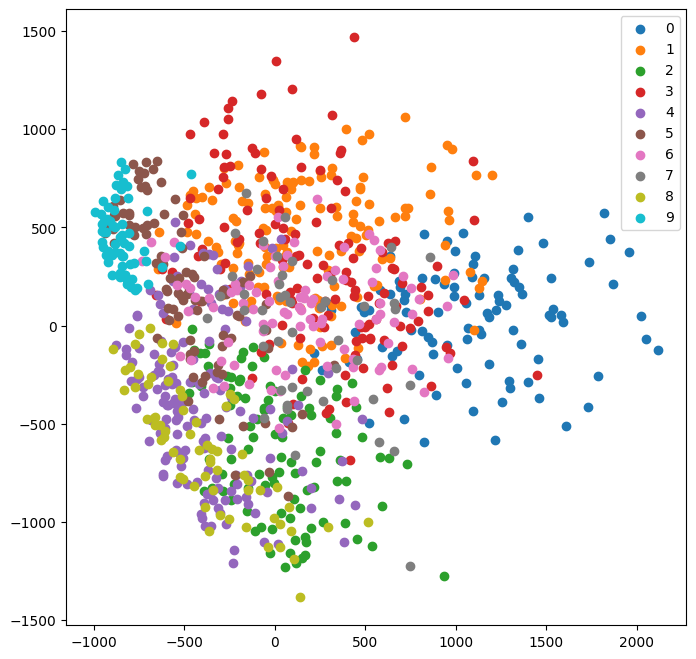

In [11]:
unique_labels = [0,1,2,3,4,5,6,7,8,9]

import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(reduced_data[clusters == i, 0], 
                reduced_data[clusters == i, 1], 
                label=i) 
plt.legend() 
plt.show() 

# > **Save to CSV**

In [12]:
df = pd.DataFrame({'ID': IDs, 'label': clusters})

df.to_csv('prediction.csv', index=False)